# Handcrafted Features

## Imports

In [ ]:

########################### (https://github.com/curiousily/TensorFlow-on-Android-for-Human-Activity-Recognition-with-LSTMs/blob/master/human_activity_recognition.ipynb) imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

#!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from keras import backend as K
from sklearn.utils import shuffle

from matplotlib.pyplot import figure


########################### (https://github.com/curiousily/TensorFlow-on-Android-for-Human-Activity-Recognition-with-LSTMs/blob/master/human_activity_recognition.ipynb) imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle




/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Upload Data 

---------------------------------



Train

In [ ]:
from google.colab import files
uploaded_signal_train = files.upload()

Saving 29_2_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 29_2_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP
Saving 29_3_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 29_3_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP
Saving 29_4_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 29_4_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP
Saving 29_5_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 29_5_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP
Saving 29_6_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 29_6_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP
Saving 35_2_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 35_2_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP
Saving 35_3_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 35_3_Participant_SlideSize_10_Handcrafted_Feat

Test

In [ ]:
from google.colab import files
uploaded_signal_test = files.upload()

Saving 29_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 29_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP
Saving 29_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 29_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP
Saving 35_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 35_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP
Saving 35_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 35_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP
Saving 37_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 37_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP
Saving 37_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 37_8_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP
Saving 43_7_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP to 43_7_Participant_SlideSize_10_Handcrafted_Feat

### Reading in segments & labels

Train

In [ ]:
# getting keys, which is file names of npy 
list_of_dataframes_train = [key for key in uploaded_signal_train.keys()]


# set up list to hold all loaded npy 
all_dataframe_train = [] 


for i in range(len(list_of_dataframes_train)):

    # load in the data 
    dataframe_train = pd.read_csv(list_of_dataframes_train[i])


    # append the data to 'all' list
    all_dataframe_train.append(dataframe_train) 


all_df_train = pd.concat(all_dataframe_train)

Test

In [ ]:
# getting keys, which is file names of npy 
list_of_dataframes_test = [key for key in uploaded_signal_test.keys()]


# set up list to hold all loaded npy 
all_dataframe_test = [] 


for i in range(len(list_of_dataframes_test)):

    # load in the data 
    dataframe_test = pd.read_csv(list_of_dataframes_test[i])


    # append the data to 'all' list
    all_dataframe_test.append(dataframe_test) 


all_df_test = pd.concat(all_dataframe_test)


# Quick Look 

In [ ]:
all_df_train.head()

,Unnamed: 0,X_Mean_Acc_Move,Y_Mean_Acc_Move,Z_Mean_Acc_Move,X_Mean_Magnet,Y_Mean_Magnet,Z_Mean_Magnet,Pitch_Mean_Gyro,Roll_Mean_Gyro,Yaw_Mean_Gyro,X_Acc_Move_FFT_EnergyBands,Y_Acc_Move_FFT_EnergyBands,Z_Acc_Move_FFT_EnergyBands,X_Acc_Move_FFT_DominantFrequency,Y_Acc_Move_FFT_DominantFrequency,Z_Acc_Move_FFT_DominantFrequency,X_Acc_Move_FFT_MaxPower,Y_Acc_Move_FFT_MaxPower,Z_Acc_Move_FFT_MaxPower,X_Acc_Move_FFT_MeanWeightedFrequency,Y_Acc_Move_FFT_MeanWeightedFrequency,Z_Acc_Move_FFT_MeanWeightedFrequency,X_Acc_Move_FFT_SkewnessFrequency,Y_Acc_Move_FFT_SkewnessFrequency,Z_Acc_Move_FFT_SkewnessFrequency,X_Acc_Move_FFT_KurtosisFrequency,Y_Acc_Move_FFT_KurtosisFrequency,Z_Acc_Move_FFT_KurtosisFrequency,X_Magnet_ChangeOfSign,Y_Magnet_ChangeOfSign,Z_Magnet_ChangeOfSign,X_std_Acc_Move,Y_std_Acc_Move,Z_std_Acc_Move,X_std_Magnet,Y_std_Magnet,Z_std_Magnet,Pitch_std_Gyro,Roll_std_Gyro,Yaw_std_Gyro,...,Z_max_Magnet,Pitch_max_Gyro,Roll_max_Gyro,Yaw_max_Gyro,X_min_Acc_Move,Y_min_Acc_Move,Z_min_Acc_Move,X_min_Magnet,Y_min_Magnet,Z_min_Magnet,Pitch_min_Gyro,Roll_min_Gyro,Yaw_min_Gyro,SMA_Acc_Move,SMA_Magnet,SMA_Gyro,Energy_Acc_Move,Energy_Magnet,Energy_Gyro,X_iqr_Acc_Move,Y_iqr_Acc_Move,Z_iqr_Acc_Move,X_iqr_Magnet,Y_iqr_Magnet,Z_iqr_Magnet,Pitch_iqr_Gyro,Roll_iqr_Gyro,Yaw_iqr_Gyro,XY_corr_Acc_Move,XZ_corr_Acc_Move,YZ_corr_Acc_Move,XY_corr_Magnet,XZ_corr_Magnet,YZ_corr_Magnet,Pitch_Roll_corr_Gyro,Pitch_Yaw_corr_Gyro,Roll_Yaw_corr_Gyro,Label_segment,Participant_ID,Participant_Run
0,0,-0.070400,0.027766,0.142641,17.044407,-40.925422,-11.733570,0.001752,-0.000674,0.000774,[ 0. +0.j -0.35025445+0.2600337...,[-1.04083409e-17+0.j -2.55939195e-02+0...,[-1.04083409e-17+0.j -2.55939195e-02+0...,10.0,10.0,10.0,0.436229,0.198870,0.198870,1.325556,1.544070,1.544070,1.325556,1.544070,1.544070,1.051869,-0.096167,-0.096167,0,0,0,0.062658,0.033133,0.019372,0.075529,0.262567,0.046603,0.000836,0.001319,0.000842,...,-11.657580,0.003322,0.000701,0.001852,-0.162611,-0.020922,0.093250,16.910703,-41.395892,-11.788947,0.000490,-0.004356,-0.000560,0.253545,69.703400,0.003610,0.031473,2103.155502,0.000007,0.106706,0.047325,0.020690,0.088673,0.212342,0.068396,0.000941,0.000230,0.001343,0.650054,0.646864,0.166688,0.976184,-0.315614,-0.418929,0.207586,-0.135443,0.340183,Go,29,2
1,1,-0.039271,0.035764,0.120295,17.170560,-40.998135,-11.784185,0.001847,-0.001521,0.000674,[-4.85722573e-17+0.j 2.23103438e-01-0...,[-2.42861287e-17+0.j -5.06963327e-02-0...,[-2.42861287e-17+0.j -5.06963327e-02-0...,10.0,10.0,10.0,0.229686,0.197560,0.197560,0.718094,0.982329,0.982329,0.718094,0.982329,0.982329,0.803130,-0.975658,-0.975658,0,0,0,0.033521,0.033706,0.032789,0.161541,0.261787,0.160421,0.000721,0.001419,0.001230,...,-11.511941,0.003374,-0.000346,0.002277,-0.079357,-0.025193,0.071865,17.012864,-41.375147,-11.983210,0.000749,-0.004356,-0.001174,0.208861,69.952880,0.004653,0.020627,2114.662551,0.000010,0.052594,0.042102,0.058876,0.283236,0.350972,0.160112,0.000787,0.002293,0.002184,-0.047611,0.500043,0.690558,-0.832113,-0.639885,0.958098,0.428839,0.431372,0.711957,Go,29,2
2,2,-0.050589,0.040450,0.109518,17.455094,-40.960816,-11.832387,0.001911,-0.001855,0.001435,[-3.46944695e-17+0.j -1.68420072e-01-0...,[ 1.73472348e-17+0.j 3.24658148e-02+0...,[ 1.73472348e-17+0.j 3.24658148e-02+0...,10.0,10.0,10.0,0.169076,0.203031,0.203031,0.407889,1.491594,1.491594,0.407889,1.491594,1.491594,1.032809,-1.381218,-1.381218,0,0,0,0.024209,0.038261,0.023553,0.325961,0.378909,0.271114,0.000751,0.001081,0.001724,...,-11.494290,0.003374,-0.000485,0.004450,-0.081075,-0.025193,0.071865,17.119853,-41.569384,-12.126571,0.000749,-0.003669,-0.001174,0.208485,70.248297,0.005759,0.018794,2122.797445,0.000014,0.043845,0.043388,0.041368,0.639395,0.714543,0.568885,0.000931,0.001720,0.002547,-0.126462,-0.201085,0.755049,0.308061,-0.900659,0.000449,0.290882,0.301944,0.286744,Go,29,2
3,3,-0.043804,0.116237,0.122941,17.543596,-41.042267,-11.820921,0.001722,-0.002103,0.001734,[ 6.93889390e-17+0.j 2.02039163e-01+0...,[-8.32667

In [ ]:
all_df_test.head()

,Unnamed: 0,X_Mean_Acc_Move,Y_Mean_Acc_Move,Z_Mean_Acc_Move,X_Mean_Magnet,Y_Mean_Magnet,Z_Mean_Magnet,Pitch_Mean_Gyro,Roll_Mean_Gyro,Yaw_Mean_Gyro,X_Acc_Move_FFT_EnergyBands,Y_Acc_Move_FFT_EnergyBands,Z_Acc_Move_FFT_EnergyBands,X_Acc_Move_FFT_DominantFrequency,Y_Acc_Move_FFT_DominantFrequency,Z_Acc_Move_FFT_DominantFrequency,X_Acc_Move_FFT_MaxPower,Y_Acc_Move_FFT_MaxPower,Z_Acc_Move_FFT_MaxPower,X_Acc_Move_FFT_MeanWeightedFrequency,Y_Acc_Move_FFT_MeanWeightedFrequency,Z_Acc_Move_FFT_MeanWeightedFrequency,X_Acc_Move_FFT_SkewnessFrequency,Y_Acc_Move_FFT_SkewnessFrequency,Z_Acc_Move_FFT_SkewnessFrequency,X_Acc_Move_FFT_KurtosisFrequency,Y_Acc_Move_FFT_KurtosisFrequency,Z_Acc_Move_FFT_KurtosisFrequency,X_Magnet_ChangeOfSign,Y_Magnet_ChangeOfSign,Z_Magnet_ChangeOfSign,X_std_Acc_Move,Y_std_Acc_Move,Z_std_Acc_Move,X_std_Magnet,Y_std_Magnet,Z_std_Magnet,Pitch_std_Gyro,Roll_std_Gyro,Yaw_std_Gyro,...,Z_max_Magnet,Pitch_max_Gyro,Roll_max_Gyro,Yaw_max_Gyro,X_min_Acc_Move,Y_min_Acc_Move,Z_min_Acc_Move,X_min_Magnet,Y_min_Magnet,Z_min_Magnet,Pitch_min_Gyro,Roll_min_Gyro,Yaw_min_Gyro,SMA_Acc_Move,SMA_Magnet,SMA_Gyro,Energy_Acc_Move,Energy_Magnet,Energy_Gyro,X_iqr_Acc_Move,Y_iqr_Acc_Move,Z_iqr_Acc_Move,X_iqr_Magnet,Y_iqr_Magnet,Z_iqr_Magnet,Pitch_iqr_Gyro,Roll_iqr_Gyro,Yaw_iqr_Gyro,XY_corr_Acc_Move,XZ_corr_Acc_Move,YZ_corr_Acc_Move,XY_corr_Magnet,XZ_corr_Magnet,YZ_corr_Magnet,Pitch_Roll_corr_Gyro,Pitch_Yaw_corr_Gyro,Roll_Yaw_corr_Gyro,Label_segment,Participant_ID,Participant_Run
0,0,-0.076124,-0.120468,0.049278,-33.875146,-45.995655,-6.367973,-0.026257,0.010337,0.007172,[-2.77555756e-17+0.j 1.37753576e-01+0...,[-2.15105711e-16+0.j -1.24148937e-01-0...,[-2.15105711e-16+0.j -1.24148937e-01-0...,10.0,10.0,10.0,0.185709,0.361115,0.361115,0.940586,2.811919,2.811919,0.940586,2.811919,2.811919,-0.140800,0.013030,0.013030,0,0,0,0.029464,0.059717,0.025480,0.090983,0.432312,0.202737,0.001726,0.000816,0.000564,...,-6.053753,-0.023427,0.011591,0.008204,-0.110352,-0.210095,0.018764,-34.032648,-46.511459,-6.631243,-0.028643,0.009074,0.006152,0.245870,86.238774,0.043766,0.027819,3303.913204,0.000852,0.039805,0.111711,0.034748,0.078209,0.883509,0.291664,0.002752,0.001350,0.000357,-0.564383,-0.110777,-0.481300,0.372059,0.630439,-0.159517,-0.234880,0.146042,-0.619419,Go,29,7
1,1,-0.041836,-0.162398,0.019434,-33.965303,-46.222807,-6.371280,-0.021109,0.009694,0.007297,[-4.16333634e-17+0.j -2.36200881e-01+0...,[1.38777878e-17+0.j 2.61545902e-01+0.1...,[1.38777878e-17+0.j 2.61545902e-01+0.1...,10.0,10.0,10.0,0.257769,0.282578,0.282578,0.865151,1.465514,1.465514,0.865151,1.465514,1.465514,1.142125,-0.254912,-0.254912,0,0,0,0.036832,0.045233,0.051745,0.247288,0.223573,0.288328,0.005488,0.001473,0.001054,...,-5.923963,-0.010173,0.011591,0.008577,-0.091016,-0.210095,-0.048313,-34.330464,-46.443056,-6.631243,-0.026719,0.006262,0.004814,0.256779,86.559391,0.038099,0.034581,3330.977226,0.000626,0.061498,0.056625,0.089318,0.452031,0.453382,0.549990,0.007576,0.001594,0.001309,-0.575417,-0.844243,0.165238,0.164256,0.707979,-0.514566,-0.684291,-0.415715,0.569781,Go,29,7
2,2,0.002556,-0.127587,0.008037,-34.074917,-46.217767,-6.347775,-0.013087,0.007574,0.005216,[ 1.12757026e-17+0.j 1.33374705e-01+0...,[ 9.71445147e-17+0.j -2.53995983e-01+0...,[ 9.71445147e-17+0.j -2.53995983e-01+0...,10.0,10.0,10.0,0.251467,0.314346,0.314346,0.880355,1.106727,1.106727,0.880355,1.106727,1.106727,0.400935,1.017381,1.017381,0,0,0,0.037723,0.045408,0.047290,0.306841,0.129416,0.331304,0.004980,0.001997,0.002253,...,-5.901851,-0.007952,0.011357,0.008577,-0.057458,-0.196652,-0.048313,-34.330464,-46.443056,-6.653939,-0.023462,0.005309,0.002462,0.201909,86.640459,0.025877,0.022071,3337.696831,0.000290,0.060469,0.084910,0.075860,0.623709,0.244745,0.670500,0.006796,0.003508,0.003978,0.051040,0.121499,0.900445,0.044073,0.996561,0.003796,-0.844668,-0.796479,0.908425,Go,29,7
3,3,0.015655,-0.122543,0.002654,-33.956212,-45.812995,-6.340833,-0.010232,0.006450,0.002887,[-1.38777878e-17+0.j -1.36601945e-01-0...,

# Train Test Split for each phase 

--------------------------------------------------


In [ ]:
all_df_train['Label_segment'].value_counts()

Turn 1    3091
Turn 2    2431
Walk 2    1777
sit       1627
Walk 1    1522
Go         745
Name: Label_segment, dtype: int64

In [ ]:
all_df_test['Label_segment'].value_counts()

Turn 2    1558
Turn 1    1322
Walk 1     803
Walk 2     786
Go         745
sit        553
Name: Label_segment, dtype: int64

-------------------------------------

In [ ]:
dum_train = pd.get_dummies(all_df_train['Label_segment'] ,  prefix='Binary')
dum_test  = pd.get_dummies(all_df_test['Label_segment'] ,  prefix='Binary')

print(dum_train)

     Binary_Go  Binary_Turn 1  ...  Binary_Walk 2  Binary_sit
0            1              0  ...              0           0
1            1              0  ...              0           0
2            1              0  ...              0           0
3            1              0  ...              0           0
4            1              0  ...              0           0
..         ...            ...  ...            ...         ...
229          0              0  ...              0           1
230          0              0  ...              0           1
231          0              0  ...              0           1
232          0              0  ...              0           1
233          0              0  ...              0           1

[11193 rows x 6 columns]


In [ ]:
# Concate the dummy variables back into dataframe 

all_df_train = pd.concat([all_df_train, dum_train] , axis=1)
all_df_test = pd.concat([all_df_test, dum_test] , axis=1)

all_df_train.head()

,Unnamed: 0,X_Mean_Acc_Move,Y_Mean_Acc_Move,Z_Mean_Acc_Move,X_Mean_Magnet,Y_Mean_Magnet,Z_Mean_Magnet,Pitch_Mean_Gyro,Roll_Mean_Gyro,Yaw_Mean_Gyro,X_Acc_Move_FFT_EnergyBands,Y_Acc_Move_FFT_EnergyBands,Z_Acc_Move_FFT_EnergyBands,X_Acc_Move_FFT_DominantFrequency,Y_Acc_Move_FFT_DominantFrequency,Z_Acc_Move_FFT_DominantFrequency,X_Acc_Move_FFT_MaxPower,Y_Acc_Move_FFT_MaxPower,Z_Acc_Move_FFT_MaxPower,X_Acc_Move_FFT_MeanWeightedFrequency,Y_Acc_Move_FFT_MeanWeightedFrequency,Z_Acc_Move_FFT_MeanWeightedFrequency,X_Acc_Move_FFT_SkewnessFrequency,Y_Acc_Move_FFT_SkewnessFrequency,Z_Acc_Move_FFT_SkewnessFrequency,X_Acc_Move_FFT_KurtosisFrequency,Y_Acc_Move_FFT_KurtosisFrequency,Z_Acc_Move_FFT_KurtosisFrequency,X_Magnet_ChangeOfSign,Y_Magnet_ChangeOfSign,Z_Magnet_ChangeOfSign,X_std_Acc_Move,Y_std_Acc_Move,Z_std_Acc_Move,X_std_Magnet,Y_std_Magnet,Z_std_Magnet,Pitch_std_Gyro,Roll_std_Gyro,Yaw_std_Gyro,...,Z_min_Acc_Move,X_min_Magnet,Y_min_Magnet,Z_min_Magnet,Pitch_min_Gyro,Roll_min_Gyro,Yaw_min_Gyro,SMA_Acc_Move,SMA_Magnet,SMA_Gyro,Energy_Acc_Move,Energy_Magnet,Energy_Gyro,X_iqr_Acc_Move,Y_iqr_Acc_Move,Z_iqr_Acc_Move,X_iqr_Magnet,Y_iqr_Magnet,Z_iqr_Magnet,Pitch_iqr_Gyro,Roll_iqr_Gyro,Yaw_iqr_Gyro,XY_corr_Acc_Move,XZ_corr_Acc_Move,YZ_corr_Acc_Move,XY_corr_Magnet,XZ_corr_Magnet,YZ_corr_Magnet,Pitch_Roll_corr_Gyro,Pitch_Yaw_corr_Gyro,Roll_Yaw_corr_Gyro,Label_segment,Participant_ID,Participant_Run,Binary_Go,Binary_Turn 1,Binary_Turn 2,Binary_Walk 1,Binary_Walk 2,Binary_sit
0,0,-0.070400,0.027766,0.142641,17.044407,-40.925422,-11.733570,0.001752,-0.000674,0.000774,[ 0. +0.j -0.35025445+0.2600337...,[-1.04083409e-17+0.j -2.55939195e-02+0...,[-1.04083409e-17+0.j -2.55939195e-02+0...,10.0,10.0,10.0,0.436229,0.198870,0.198870,1.325556,1.544070,1.544070,1.325556,1.544070,1.544070,1.051869,-0.096167,-0.096167,0,0,0,0.062658,0.033133,0.019372,0.075529,0.262567,0.046603,0.000836,0.001319,0.000842,...,0.093250,16.910703,-41.395892,-11.788947,0.000490,-0.004356,-0.000560,0.253545,69.703400,0.003610,0.031473,2103.155502,0.000007,0.106706,0.047325,0.020690,0.088673,0.212342,0.068396,0.000941,0.000230,0.001343,0.650054,0.646864,0.166688,0.976184,-0.315614,-0.418929,0.207586,-0.135443,0.340183,Go,29,2,1,0,0,0,0,0
1,1,-0.039271,0.035764,0.120295,17.170560,-40.998135,-11.784185,0.001847,-0.001521,0.000674,[-4.85722573e-17+0.j 2.23103438e-01-0...,[-2.42861287e-17+0.j -5.06963327e-02-0...,[-2.42861287e-17+0.j -5.06963327e-02-0...,10.0,10.0,10.0,0.229686,0.197560,0.197560,0.718094,0.982329,0.982329,0.718094,0.982329,0.982329,0.803130,-0.975658,-0.975658,0,0,0,0.033521,0.033706,0.032789,0.161541,0.261787,0.160421,0.000721,0.001419,0.001230,...,0.071865,17.012864,-41.375147,-11.983210,0.000749,-0.004356,-0.001174,0.208861,69.952880,0.004653,0.020627,2114.662551,0.000010,0.052594,0.042102,0.058876,0.283236,0.350972,0.160112,0.000787,0.002293,0.002184,-0.047611,0.500043,0.690558,-0.832113,-0.639885,0.958098,0.428839,0.431372,0.711957,Go,29,2,1,0,0,0,0,0
2,2,-0.050589,0.040450,0.109518,17.455094,-40.960816,-11.832387,0.001911,-0.001855,0.001435,[-3.46944695e-17+0.j -1.68420072e-01-0...,[ 1.73472348e-17+0.j 3.24658148e-02+0...,[ 1.73472348e-17+0.j 3.24658148e-02+0...,10.0,10.0,10.0,0.169076,0.203031,0.203031,0.407889,1.491594,1.491594,0.407889,1.491594,1.491594,1.032809,-1.381218,-1.381218,0,0,0,0.024209,0.038261,0.023553,0.325961,0.378909,0.271114,0.000751,0.001081,0.001724,...,0.071865,17.119853,-41.569384,-12.126571,0.000749,-0.003669,-0.001174,0.208485,70.248297,0.005759,0.018794,2122.797445,0.000014,0.043845,0.043388,0.041368,0.639395,0.714543,0.568885,0.000931,0.001720,0.002547,-0.126462,-0.201085,0.755049,0.308061,-0.900659,0.000449,0.290882,0.301944,0.286744,Go,29,2,1,0,0,0,0,0
3,3,-0.043804,0.116237,0.122941,17.543596,-41.042267,-11.820921,0.001722,-0.002103,0.001734,[ 6.93889390e-17+0.j 2.02039163e-01+0...,[-8.32667268e-17+0.j -2.15497839e-01+0...,[-8.32667268e-17+0.j -2.15497839e-01+0...,10.0,10.0,10.0,0.216808,0.400284,0.400284,0.622609,1.102918,1.102918,0.62

-------------------------

Quick Shuffle

In [ ]:
all_df_train = shuffle(all_df_train)
all_df_test = shuffle(all_df_test)

In [ ]:
all_df_train.columns

Index(['Unnamed: 0', 'X_Mean_Acc_Move', 'Y_Mean_Acc_Move', 'Z_Mean_Acc_Move',
       'X_Mean_Magnet', 'Y_Mean_Magnet', 'Z_Mean_Magnet', 'Pitch_Mean_Gyro',
       'Roll_Mean_Gyro', 'Yaw_Mean_Gyro', 'X_Acc_Move_FFT_EnergyBands',
       'Y_Acc_Move_FFT_EnergyBands', 'Z_Acc_Move_FFT_EnergyBands',
       'X_Acc_Move_FFT_DominantFrequency', 'Y_Acc_Move_FFT_DominantFrequency',
       'Z_Acc_Move_FFT_DominantFrequency', 'X_Acc_Move_FFT_MaxPower',
       'Y_Acc_Move_FFT_MaxPower', 'Z_Acc_Move_FFT_MaxPower',
       'X_Acc_Move_FFT_MeanWeightedFrequency',
       'Y_Acc_Move_FFT_MeanWeightedFrequency',
       'Z_Acc_Move_FFT_MeanWeightedFrequency',
       'X_Acc_Move_FFT_SkewnessFrequency', 'Y_Acc_Move_FFT_SkewnessFrequency',
       'Z_Acc_Move_FFT_SkewnessFrequency', 'X_Acc_Move_FFT_KurtosisFrequency',
       'Y_Acc_Move_FFT_KurtosisFrequency', 'Z_Acc_Move_FFT_KurtosisFrequency',
       'X_Magnet_ChangeOfSign', 'Y_Magnet_ChangeOfSign',
       'Z_Magnet_ChangeOfSign', 'X_std_Acc_Move', 'Y_std_Acc_

In [ ]:
# Getting X_train & y_train
X_train = all_df_train.drop(['Unnamed: 0' , 'Label_segment' , 'Participant_ID' , 'Participant_Run', 'X_Acc_Move_FFT_EnergyBands', 	'Y_Acc_Move_FFT_EnergyBands', 	'Z_Acc_Move_FFT_EnergyBands' ,
                             'Binary_Go' , 'Binary_Walk 1', 'Binary_Turn 1', 'Binary_Walk 2', 'Binary_Turn 2', 'Binary_sit' 	], axis = 1)

In [ ]:
# Y Train Go
y_train_go = all_df_train['Binary_Go'].values

# Y Train Walk 1 
y_train_walk1 = all_df_train['Binary_Walk 1'].values

# Y Train Turn 1 
y_train_turn1 = all_df_train['Binary_Turn 1'].values

# Y Train Walk 2 
y_train_walk2 = all_df_train['Binary_Walk 2'].values

# Y Train Turn 2 
y_train_turn2 = all_df_train['Binary_Turn 2'].values

# Y Train Sit 
y_train_sit = all_df_train['Binary_sit'].values

In [ ]:
import imblearn
#print(imblearn.__version__)

from imblearn.under_sampling import RandomUnderSampler

rs = RandomUnderSampler(random_state=42 ,sampling_strategy ='majority')


In [ ]:
# fit and apply the transform
X_train_under_go, y_train_under_go = rs.fit_resample(X_train, y_train_go)


# fit and apply the transform
X_train_under_walk1, y_train_under_walk1 = X_train, y_train_walk1


# fit and apply the transform
X_train_under_walk2, y_train_under_walk2 = X_train, y_train_walk2


# fit and apply the transform
X_train_under_turn1, y_train_under_turn1 = X_train, y_train_turn1


# fit and apply the transform
X_train_under_turn2, y_train_under_turn2 = X_train, y_train_turn2

# fit and apply the transform
X_train_under_sit, y_train_under_sit = rs.fit_resample(X_train, y_train_sit)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


--------------------------

Logic Check since using 2 pd.get_dums 

Go's will be coded as 0 and not Go 1 

In [ ]:
print(Counter(y_train_go))

print(Counter( y_train_under_go))

Counter({0: 10448, 1: 745})
Counter({0: 745, 1: 745})


-----------------------------------

In [ ]:
# convert to dummy category
y_train_under_dum_go = pd.get_dummies(y_train_under_go)

# convert to dummy category
y_train_under_dum_walk1 = pd.get_dummies(y_train_under_walk1)


# convert to dummy category
y_train_under_dum_walk2 = pd.get_dummies(y_train_under_walk2)


# convert to dummy category
y_train_under_dum_turn1 = pd.get_dummies(y_train_under_turn1)

# convert to dummy category
y_train_under_dum_turn2 = pd.get_dummies(y_train_under_turn2)

# convert to dummy category
y_train_under_dum_sit = pd.get_dummies(y_train_under_sit)


# check one 
print(f'\nDummy labels Shape {y_train_under_dum_go.shape}')


Dummy labels Shape (1490, 2)


------------------

In [ ]:
# Getting X_train & y_train

X_test =  all_df_test.drop(['Unnamed: 0' , 'Label_segment' , 'Participant_ID' , 'Participant_Run',  'X_Acc_Move_FFT_EnergyBands', 	'Y_Acc_Move_FFT_EnergyBands', 	'Z_Acc_Move_FFT_EnergyBands' ,
                             'Binary_Go' , 'Binary_Walk 1', 'Binary_Turn 1', 'Binary_Walk 2', 'Binary_Turn 2', 'Binary_sit' 	], axis = 1)


In [ ]:
y_test_go =  all_df_test['Binary_Go'].values

y_test_walk1=  all_df_test['Binary_Walk 1'].values

y_test_walk2 =  all_df_test['Binary_Walk 2'].values

y_test_turn1 =  all_df_test['Binary_Turn 1'].values

y_test_turn2 =  all_df_test['Binary_Turn 2'].values

y_test_sit =  all_df_test['Binary_sit'].values


In [ ]:
# convert to dummy category
y_test_dum_go = pd.get_dummies(y_test_go)

# convert to dummy category
y_test_dum_walk1 = pd.get_dummies(y_test_walk1)

# convert to dummy category
y_test_dum_walk2 = pd.get_dummies(y_test_walk2)

# convert to dummy category
y_test_dum_turn1 = pd.get_dummies(y_test_turn1)

# convert to dummy category
y_test_dum_turn2 = pd.get_dummies(y_test_turn2)

# convert to dummy category
y_test_dum_sit = pd.get_dummies(y_test_sit)


# test one
print(f'\nDummy labels Shape {y_test_dum_go.shape}')


Dummy labels Shape (5767, 2)


--------------------------------------

Standard Scale 

In [ ]:
# Set up ss for non-shuffled data
ss = StandardScaler()


X_train_under_go_scale = ss.fit_transform(X_train_under_go)

X_train_under_walk1_scale = ss.fit_transform(X_train_under_walk1)

X_train_under_walk2_scale = ss.fit_transform(X_train_under_walk2)

X_train_under_turn1_scale = ss.fit_transform(X_train_under_turn1)

X_train_under_turn2_scale = ss.fit_transform(X_train_under_turn2)

X_train_under_sit_scale = ss.fit_transform(X_train_under_sit)


X_test_scale = ss.transform(X_test)


----------------------

Shuffle Again

In [ ]:
from sklearn.utils import shuffle

X_train_under_go_scale    , y_train_under_dum_go    = shuffle(X_train_under_go_scale , y_train_under_dum_go , random_state= 0)

X_train_under_walk1_scale , y_train_under_dum_walk1 = shuffle(X_train_under_walk1_scale , y_train_under_dum_walk1 , random_state= 0)

X_train_under_walk2_scale, y_train_under_dum_walk2 = shuffle(X_train_under_walk2_scale, y_train_under_dum_walk2 , random_state= 0)

X_train_under_turn1_scale, y_train_under_dum_turn1 = shuffle(X_train_under_turn1_scale, y_train_under_dum_turn1 , random_state= 0)

X_train_under_turn2_scale, y_train_under_dum_turn2 = shuffle(X_train_under_turn2_scale, y_train_under_dum_turn2 , random_state= 0)

X_train_under_sit_scale,   y_train_under_dum_sit = shuffle(X_train_under_sit_scale, y_train_under_dum_sit , random_state= 0)



---------------------------

Deep 

In [ ]:
# lstm model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from matplotlib import pyplot

from keras.optimizers import Adam

import time
import tensorflow as tf

------------------------------------------------------

# Go

In [ ]:
#n_timesteps, n_features, n_outputs = X_train.shape[1] , X_train.shape[2] , y_train_dum.shape[1]

n_outputs =  y_train_under_dum_go.shape[1]

# set up model
model = Sequential()

#input layer
model.add(Dense(100, activation='relu' , input_shape = (X_train_under_go_scale.shape[1], )))


# hidden layers
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(100, activation='relu'))

# output layer
model.add(Dense(n_outputs, activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.CategoricalAccuracy()])

Early Stopping

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

 	
# patient early stopping
#es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=5 , min_delta=0.05)


earlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.base_model_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')

Fit 

In [ ]:
# just for timing model
t0 = time.time()

# fitting model 
history = model.fit(X_train_under_go_scale, y_train_under_dum_go,
                    validation_data=(X_test_scale, y_test_dum_go ),
                    epochs = 100,
                    batch_size=200,
                    callbacks=[earlyStopping, mcp_save]
                    )


t1 = time.time()

total = t1-t0

print(f'Time Taken: {total}')

Epoch 1/100
8/8 [==============================] - 15s 95ms/step - loss: 0.7010 - categorical_accuracy: 0.5574 - val_loss: 0.7643 - val_categorical_accuracy: 0.4729
Epoch 2/100
8/8 [==============================] - 0s 14ms/step - loss: 0.6093 - categorical_accuracy: 0.4539 - val_loss: 0.7256 - val_categorical_accuracy: 0.4840
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5576 - categorical_accuracy: 0.4911 - val_loss: 0.7075 - val_categorical_accuracy: 0.5097
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 0.5037 - categorical_accuracy: 0.5177 - val_loss: 0.7350 - val_categorical_accuracy: 0.5307
Epoch 5/100
8/8 [==============================] - 0s 13ms/step - loss: 0.4483 - categorical_accuracy: 0.5365 - val_loss: 0.7153 - val_categorical_accuracy: 0.5485
Epoch 6/100
8/8 [==============================] - 0s 13ms/step - loss: 0.4044 - categorical_accuracy: 0.5544 - val_loss: 0.6634 - val_categorical_accuracy: 0.5658
Epoch 7/100
8/8 

Learning Curves

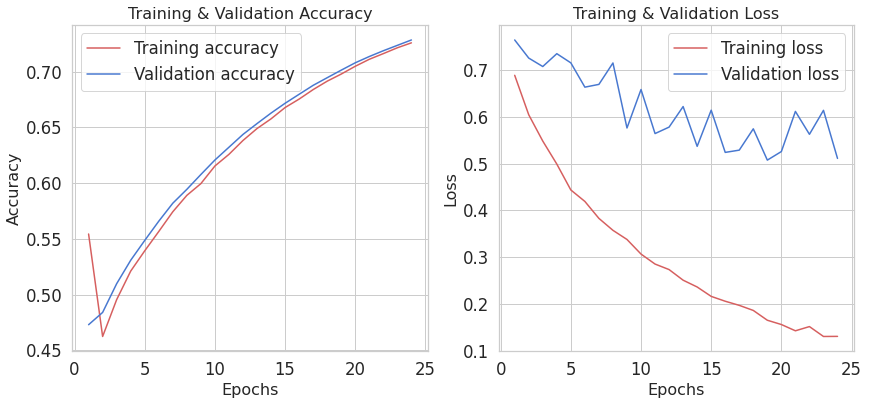

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['categorical_accuracy']
val_accuracy = history_dict['val_categorical_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'r', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'r', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

------------------------

Reports

Make Predicitions

In [ ]:
# For Confusion matrix & Classification Report 

y_preds = model.predict(X_test_scale)
max_predictions = np.argmax(y_preds, axis=1)

max_test = np.argmax(np.asarray(y_test_dum_go), axis=1)



##################


y_preds_train = model.predict(X_train_under_go_scale)

max_predictions_train = np.argmax(y_preds_train, axis=1)
max_train = np.argmax(np.asarray(y_train_under_dum_go), axis=1)



# Metrics 

Test

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

print("Test Accuracy : \t\t" ,accuracy_score(max_test, max_predictions))
print("Test Balanced Accuracy : \t" , balanced_accuracy_score(max_test, max_predictions))
print("Test F1 Score : \t\t" , f1_score(max_test, max_predictions , average='weighted'))

Test Accuracy : 		 0.8255592162302757
Test Balanced Accuracy : 	 0.8838364885777745
Test F1 Score : 		 0.8504065423010492


Train

In [ ]:
print("Train Accuracy : \t\t" ,accuracy_score(max_train, max_predictions_train))
print("Train Balanced Accuracy : \t" , balanced_accuracy_score(max_train, max_predictions_train))
print("Train F1 Score : \t\t" , f1_score(max_train, max_predictions_train, average='weighted'))

Train Accuracy : 		 0.978523489932886
Train Balanced Accuracy : 	 0.9785234899328858
Train F1 Score : 		 0.9785233351530843


Imports 

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# set up labels 
LABELS = [ 'Not Go' , 'Go' ]


# Test Set 

In [ ]:
print(classification_report(max_test, max_predictions , target_names=LABELS))


              precision    recall  f1-score   support

      Not Go       0.99      0.81      0.89      5022
          Go       0.42      0.96      0.59       745

    accuracy                           0.83      5767
   macro avg       0.71      0.88      0.74      5767
weighted avg       0.92      0.83      0.85      5767



# Train Set 

In [ ]:
print(classification_report(max_train, max_predictions_train , target_names=LABELS))

              precision    recall  f1-score   support

      Not Go       0.98      0.98      0.98       745
          Go       0.98      0.98      0.98       745

    accuracy                           0.98      1490
   macro avg       0.98      0.98      0.98      1490
weighted avg       0.98      0.98      0.98      1490



--------------------

# Confusion Matrix 

In [ ]:
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions  )

confusion_matrix_t = metrics.confusion_matrix(max_train, max_predictions_train )

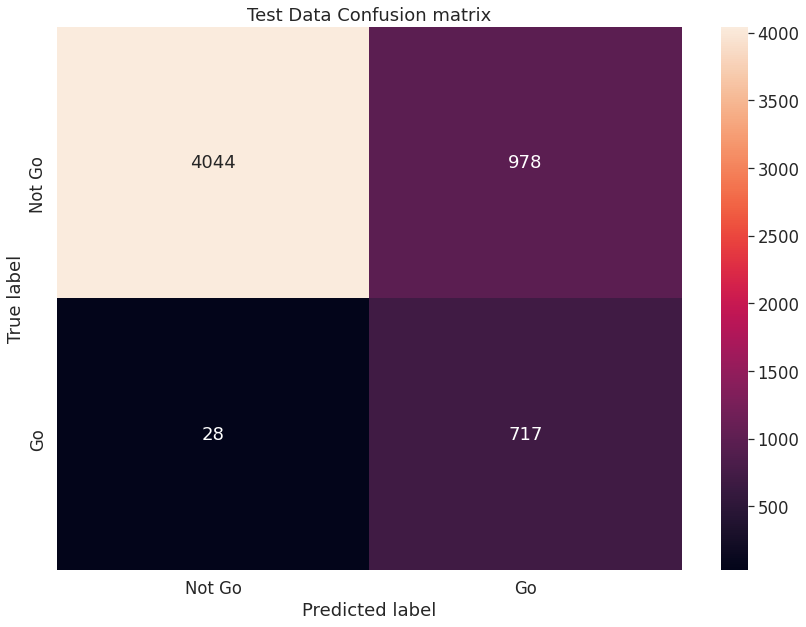

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS,  annot=True, fmt="d");
plt.title("Test Data Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

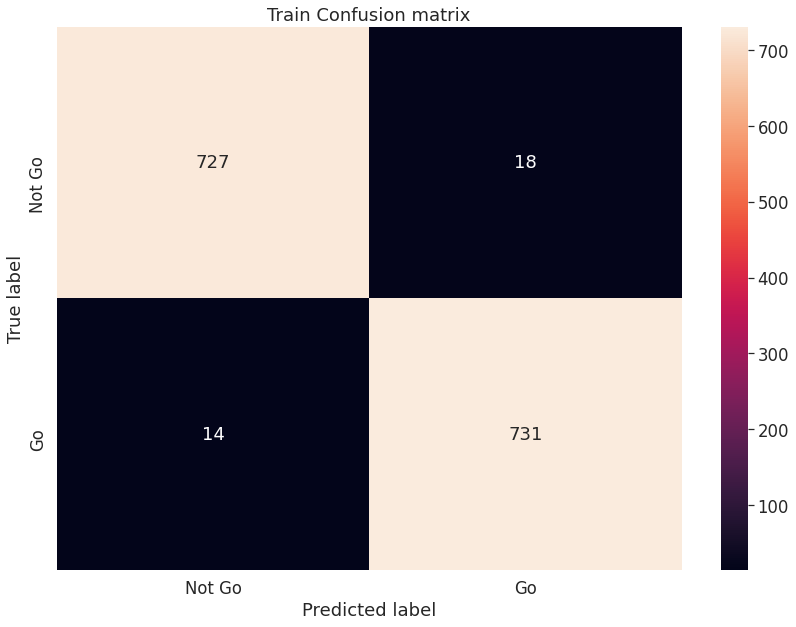

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(confusion_matrix_t, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Train Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

-------------------------------------

<br>

------------------------------------------------------

# Walk 1 

In [ ]:
#n_timesteps, n_features, n_outputs = X_train.shape[1] , X_train.shape[2] , y_train_dum.shape[1]

n_outputs =  y_train_under_dum_go.shape[1]

# set up model
model_walk1 = Sequential()

#input layer
model_walk1.add(Dense(100, activation='relu' , input_shape = (X_train_under_go_scale.shape[1], )))


# hidden layers
model_walk1.add(Dense(50, activation='relu'))
model_walk1.add(Dropout(0.5))
model_walk1.add(Dense(50, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(100, activation='relu'))

# output layer
model_walk1.add(Dense(n_outputs, activation='softmax'))

# compile model
model_walk1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.CategoricalAccuracy()])

Early Stopping

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

 	
# patient early stopping
#es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=5 , min_delta=0.05)


earlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.base_model_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')

Fit 

In [ ]:
# just for timing model
t0 = time.time()

# fitting model 
history_walk1 = model_walk1.fit(X_train_under_walk1_scale, y_train_under_dum_walk1,
                    validation_data=(X_test_scale, y_test_dum_walk1 ),
                    epochs = 100,
                    batch_size=20,
                    callbacks=[earlyStopping, mcp_save]
                    )


t1 = time.time()

total = t1-t0

print(f'Time Taken: {total}')

Epoch 1/100
560/560 [==============================] - 2s 3ms/step - loss: 0.3969 - categorical_accuracy: 0.8677 - val_loss: 0.3665 - val_categorical_accuracy: 0.8656
Epoch 2/100
560/560 [==============================] - 1s 2ms/step - loss: 0.3263 - categorical_accuracy: 0.8648 - val_loss: 0.3577 - val_categorical_accuracy: 0.8683
Epoch 3/100
560/560 [==============================] - 1s 2ms/step - loss: 0.2843 - categorical_accuracy: 0.8690 - val_loss: 0.3551 - val_categorical_accuracy: 0.8712
Epoch 4/100
560/560 [==============================] - 1s 2ms/step - loss: 0.2639 - categorical_accuracy: 0.8719 - val_loss: 0.3717 - val_categorical_accuracy: 0.8744
Epoch 5/100
560/560 [==============================] - 1s 2ms/step - loss: 0.2444 - categorical_accuracy: 0.8748 - val_loss: 0.3905 - val_categorical_accuracy: 0.8761
Epoch 6/100
560/560 [==============================] - 1s 2ms/step - loss: 0.2316 - categorical_accuracy: 0.8761 - val_loss: 0.4048 - val_categorical_accuracy: 0.877

Learning Curves

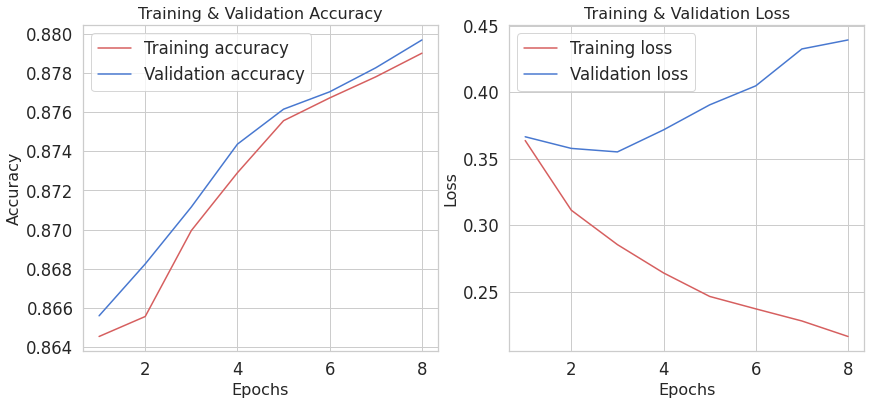

In [ ]:
history_dict = history_walk1.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['categorical_accuracy']
val_accuracy = history_dict['val_categorical_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'r', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'r', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

------------------------

Reports

Make Predicitions

In [ ]:
# For Confusion matrix & Classification Report 

y_preds = model_walk1.predict(X_test_scale)
max_predictions = np.argmax(y_preds, axis=1)

max_test = np.argmax(np.asarray(y_test_dum_walk1), axis=1)

##################


y_preds_train = model_walk1.predict(X_train_under_walk1_scale)

max_predictions_train = np.argmax(y_preds_train, axis=1)
max_train = np.argmax(np.asarray(y_train_under_dum_walk1), axis=1)


# Metrics 

Test

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

print("Test Accuracy : \t\t" ,accuracy_score(max_test, max_predictions))
print("Test Balanced Accuracy : \t" , balanced_accuracy_score(max_test, max_predictions))
print("Test F1 Score : \t\t" , f1_score(max_test, max_predictions , average='weighted'))

Test Accuracy : 		 0.8520894745968441
Test Balanced Accuracy : 	 0.605093033477401
Test F1 Score : 		 0.8352762270787982


Train

In [ ]:
print("Train Accuracy : \t\t" ,accuracy_score(max_train, max_predictions_train))
print("Train Balanced Accuracy : \t" , balanced_accuracy_score(max_train, max_predictions_train))
print("Train F1 Score : \t\t" , f1_score(max_train, max_predictions_train, average='weighted'))

Train Accuracy : 		 0.924953095684803
Train Balanced Accuracy : 	 0.7533896060821528
Train F1 Score : 		 0.9163794895280186


Imports 

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# set up labels 
LABELS = ['Not Walk 1', 'Walk 1']


# Test Set 

In [ ]:
print(classification_report(max_test, max_predictions , target_names=LABELS))


              precision    recall  f1-score   support

  Not Walk 1       0.89      0.95      0.92      4964
      Walk 1       0.45      0.26      0.33       803

    accuracy                           0.85      5767
   macro avg       0.67      0.61      0.62      5767
weighted avg       0.83      0.85      0.84      5767



# Train Set 

In [ ]:
print(classification_report(max_train, max_predictions_train , target_names=LABELS))

              precision    recall  f1-score   support

  Not Walk 1       0.93      0.99      0.96      9671
      Walk 1       0.88      0.52      0.65      1522

    accuracy                           0.92     11193
   macro avg       0.91      0.75      0.81     11193
weighted avg       0.92      0.92      0.92     11193



--------------------

# Confusion Matrix 

In [ ]:
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions  )

confusion_matrix_t = metrics.confusion_matrix(max_train, max_predictions_train )

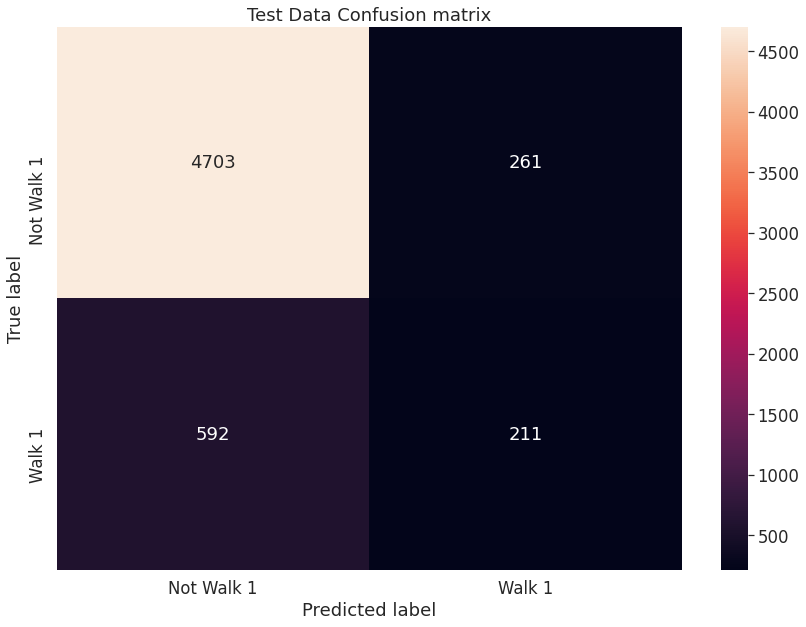

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS,  annot=True, fmt="d");
plt.title("Test Data Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

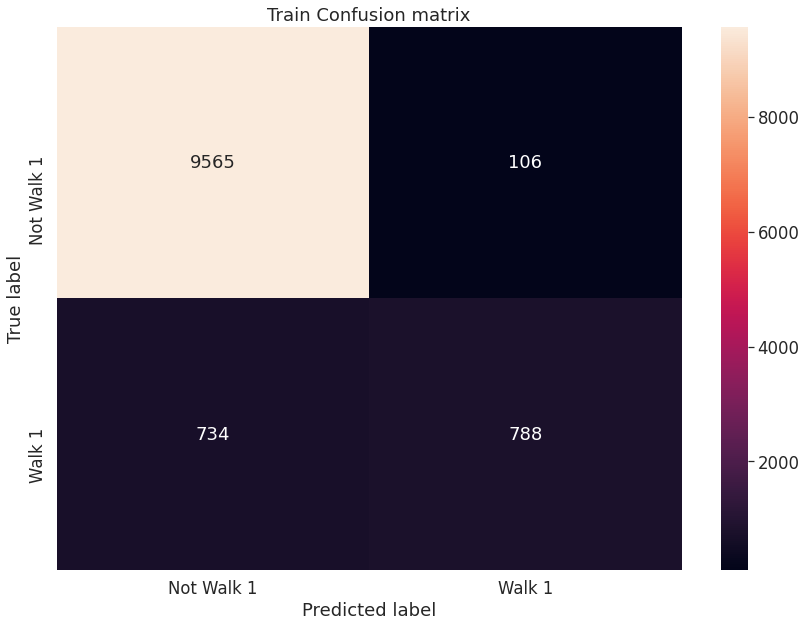

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(confusion_matrix_t, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Train Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

-------------------------------------

<br>

------------------------------------------------------

# Walk 2

In [ ]:
#n_timesteps, n_features, n_outputs = X_train.shape[1] , X_train.shape[2] , y_train_dum.shape[1]

n_outputs =  y_train_under_dum_go.shape[1]

# set up model
model_walk2 = Sequential()

#input layer
model_walk2.add(Dense(100, activation='relu' , input_shape = (X_train_under_go_scale.shape[1], )))


# hidden layers
model_walk2.add(Dense(50, activation='relu'))
model_walk2.add(Dropout(0.5))
model_walk2.add(Dense(50, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(100, activation='relu'))

# output layer
model_walk2.add(Dense(n_outputs, activation='softmax'))

# compile model
model_walk2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.CategoricalAccuracy()])

Early Stopping

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

 	
# patient early stopping
#es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=5 , min_delta=0.05)


earlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.base_model_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')

Fit 

In [ ]:
# just for timing model
t0 = time.time()

# fitting model 
history_walk2 = model_walk2.fit(X_train_under_walk2_scale, y_train_under_dum_walk2,
                    validation_data=(X_test_scale, y_test_dum_walk2 ),
                    epochs = 100,
                    batch_size=200,
                    callbacks=[earlyStopping, mcp_save]
                    )


t1 = time.time()

total = t1-t0

print(f'Time Taken: {total}')

Epoch 1/100
56/56 [==============================] - 1s 9ms/step - loss: 0.5099 - categorical_accuracy: 0.7534 - val_loss: 0.3711 - val_categorical_accuracy: 0.8339
Epoch 2/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4048 - categorical_accuracy: 0.8399 - val_loss: 0.3418 - val_categorical_accuracy: 0.8424
Epoch 3/100
56/56 [==============================] - 0s 4ms/step - loss: 0.3771 - categorical_accuracy: 0.8444 - val_loss: 0.3263 - val_categorical_accuracy: 0.8453
Epoch 4/100
56/56 [==============================] - 0s 4ms/step - loss: 0.3537 - categorical_accuracy: 0.8467 - val_loss: 0.3143 - val_categorical_accuracy: 0.8480
Epoch 5/100
56/56 [==============================] - 0s 4ms/step - loss: 0.3297 - categorical_accuracy: 0.8491 - val_loss: 0.3029 - val_categorical_accuracy: 0.8508
Epoch 6/100
56/56 [==============================] - 0s 4ms/step - loss: 0.3100 - categorical_accuracy: 0.8519 - val_loss: 0.2913 - val_categorical_accuracy: 0.8535
Epoch 7/10

Learning Curves

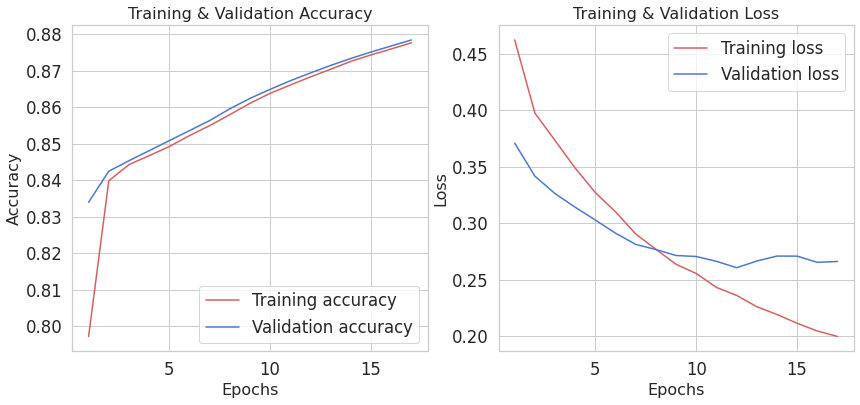

In [ ]:
history_dict = history_walk2.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['categorical_accuracy']
val_accuracy = history_dict['val_categorical_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'r', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'r', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

------------------------

Reports

Make Predicitions

In [ ]:
# For Confusion matrix & Classification Report 

y_preds = model_walk2.predict(X_test_scale)
max_predictions = np.argmax(y_preds, axis=1)

max_test = np.argmax(np.asarray(y_test_dum_walk2), axis=1)

##################


y_preds_train = model_walk2.predict(X_train_under_walk2_scale)

max_predictions_train = np.argmax(y_preds_train, axis=1)
max_train = np.argmax(np.asarray(y_train_under_dum_walk2), axis=1)


# Metrics 

Test

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

print("Test Accuracy : \t\t" ,accuracy_score(max_test, max_predictions))
print("Test Balanced Accuracy : \t" , balanced_accuracy_score(max_test, max_predictions))
print("Test F1 Score : \t\t" , f1_score(max_test, max_predictions , average='weighted'))

Test Accuracy : 		 0.8852089474596844
Test Balanced Accuracy : 	 0.7412129195267717
Test F1 Score : 		 0.8834096335332258


Train

In [ ]:
print("Train Accuracy : \t\t" ,accuracy_score(max_train, max_predictions_train))
print("Train Balanced Accuracy : \t" , balanced_accuracy_score(max_train, max_predictions_train))
print("Train F1 Score : \t\t" , f1_score(max_train, max_predictions_train, average='weighted'))

Train Accuracy : 		 0.9390690610202805
Train Balanced Accuracy : 	 0.8688238962978758
Train F1 Score : 		 0.9379673205230219


Imports 

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# set up labels 
LABELS = ['Not Walk 2', 'Walk 2']


# Test Set 

In [ ]:
print(classification_report(max_test, max_predictions,  target_names=LABELS))


              precision    recall  f1-score   support

  Not Walk 2       0.93      0.94      0.93      4981
      Walk 2       0.58      0.54      0.56       786

    accuracy                           0.89      5767
   macro avg       0.76      0.74      0.75      5767
weighted avg       0.88      0.89      0.88      5767



# Train Set 

In [ ]:
print(classification_report(max_train, max_predictions_train , target_names=LABELS))

              precision    recall  f1-score   support

  Not Walk 2       0.96      0.97      0.96      9416
      Walk 2       0.84      0.77      0.80      1777

    accuracy                           0.94     11193
   macro avg       0.90      0.87      0.88     11193
weighted avg       0.94      0.94      0.94     11193



--------------------

# Confusion Matrix 

In [ ]:
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions  )

confusion_matrix_t = metrics.confusion_matrix(max_train, max_predictions_train )

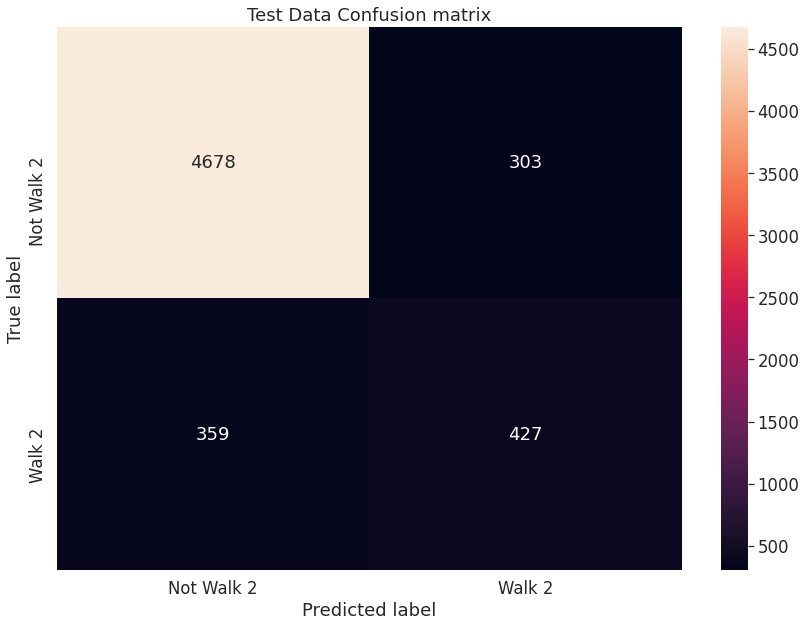

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS,  annot=True, fmt="d");
plt.title("Test Data Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

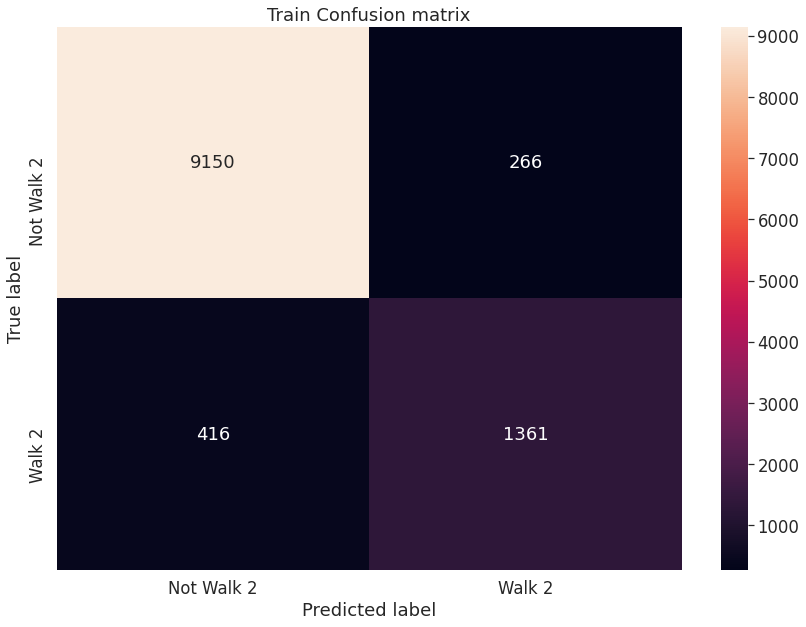

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(confusion_matrix_t, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Train Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

-------------------------------------

<br>

------------------------------------------------------

# Turn 1 

In [ ]:
#n_timesteps, n_features, n_outputs = X_train.shape[1] , X_train.shape[2] , y_train_dum.shape[1]

n_outputs =  y_train_under_dum_go.shape[1]

# set up model
model_turn1 = Sequential()

#input layer
model_turn1.add(Dense(100, activation='relu' , input_shape = (X_train_under_go_scale.shape[1], )))


# hidden layers
model_turn1.add(Dense(50, activation='relu'))
model_turn1.add(Dropout(0.5))
model_turn1.add(Dense(50, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(100, activation='relu'))

# output layer
model_turn1.add(Dense(n_outputs, activation='softmax'))

# compile model
model_turn1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.CategoricalAccuracy()])

Early Stopping

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

 	
# patient early stopping
#es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=5 , min_delta=0.05)


earlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.base_model_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')

Fit 

In [ ]:
# just for timing model
t0 = time.time()

# fitting model 
history_turn1 = model_turn1.fit(X_train_under_turn1_scale, y_train_under_dum_turn1,
                    validation_data=(X_test_scale, y_test_dum_turn1 ),
                    epochs = 100,
                    batch_size=200,
                    callbacks=[earlyStopping, mcp_save]
                    )


t1 = time.time()

total = t1-t0

print(f'Time Taken: {total}')

Epoch 1/100
56/56 [==============================] - 1s 9ms/step - loss: 0.6229 - categorical_accuracy: 0.6278 - val_loss: 0.4836 - val_categorical_accuracy: 0.7214
Epoch 2/100
56/56 [==============================] - 0s 4ms/step - loss: 0.5113 - categorical_accuracy: 0.7323 - val_loss: 0.4384 - val_categorical_accuracy: 0.7420
Epoch 3/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4700 - categorical_accuracy: 0.7476 - val_loss: 0.4054 - val_categorical_accuracy: 0.7559
Epoch 4/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4146 - categorical_accuracy: 0.7607 - val_loss: 0.3820 - val_categorical_accuracy: 0.7681
Epoch 5/100
56/56 [==============================] - 0s 4ms/step - loss: 0.3825 - categorical_accuracy: 0.7720 - val_loss: 0.3698 - val_categorical_accuracy: 0.7789
Epoch 6/100
56/56 [==============================] - 0s 3ms/step - loss: 0.3487 - categorical_accuracy: 0.7824 - val_loss: 0.3425 - val_categorical_accuracy: 0.7890
Epoch 7/10

Learning Curves

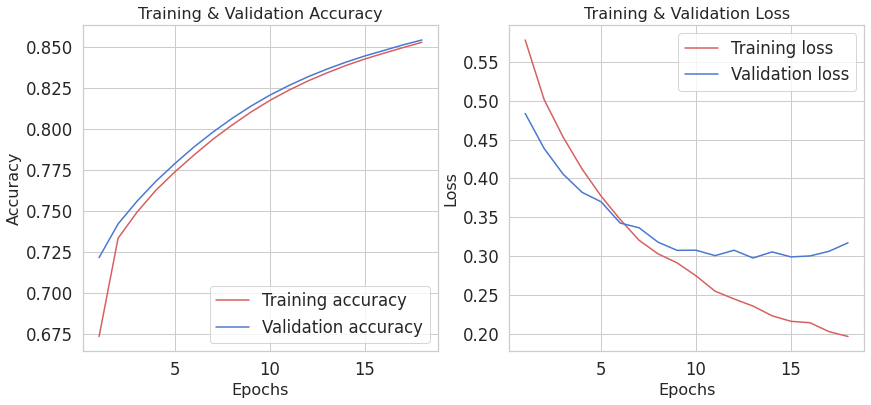

In [ ]:
history_dict = history_turn1.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['categorical_accuracy']
val_accuracy = history_dict['val_categorical_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'r', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'r', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

------------------------

Reports

Make Predicitions

In [ ]:
# For Confusion matrix & Classification Report 

y_preds = model_turn1.predict(X_test_scale)
max_predictions = np.argmax(y_preds, axis=1)

max_test = np.argmax(np.asarray(y_test_dum_turn1), axis=1)

##################


y_preds_train = model_turn1.predict(X_train_under_turn1_scale)

max_predictions_train = np.argmax(y_preds_train, axis=1)
max_train = np.argmax(np.asarray(y_train_under_dum_turn1), axis=1)


# Metrics 

Test

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

print("Test Accuracy : \t\t" ,accuracy_score(max_test, max_predictions))
print("Test Balanced Accuracy : \t" , balanced_accuracy_score(max_test, max_predictions))
print("Test F1 Score : \t\t" , f1_score(max_test, max_predictions , average='weighted'))

Test Accuracy : 		 0.8732443211375065
Test Balanced Accuracy : 	 0.8444316056559495
Test F1 Score : 		 0.8759606313741287


Train

In [ ]:
print("Train Accuracy : \t\t" ,accuracy_score(max_train, max_predictions_train))
print("Train Balanced Accuracy : \t" , balanced_accuracy_score(max_train, max_predictions_train))
print("Train F1 Score : \t\t" , f1_score(max_train, max_predictions_train, average='weighted'))

Train Accuracy : 		 0.9466630930045564
Train Balanced Accuracy : 	 0.9363447051388871
Train F1 Score : 		 0.9468228961338948


Imports 

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# set up labels 
LABELS = ['Not Turn 1', 'Turn 1']


# Test Set 

In [ ]:
print(classification_report(max_test, max_predictions , target_names=LABELS))


              precision    recall  f1-score   support

  Not Turn 1       0.94      0.90      0.92      4445
      Turn 1       0.70      0.79      0.74      1322

    accuracy                           0.87      5767
   macro avg       0.82      0.84      0.83      5767
weighted avg       0.88      0.87      0.88      5767



# Train Set 

In [ ]:
print(classification_report(max_train, max_predictions_train , target_names=LABELS))

              precision    recall  f1-score   support

  Not Turn 1       0.97      0.96      0.96      8102
      Turn 1       0.90      0.91      0.90      3091

    accuracy                           0.95     11193
   macro avg       0.93      0.94      0.93     11193
weighted avg       0.95      0.95      0.95     11193



--------------------

# Confusion Matrix 

In [ ]:
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions  )

confusion_matrix_t = metrics.confusion_matrix(max_train, max_predictions_train )

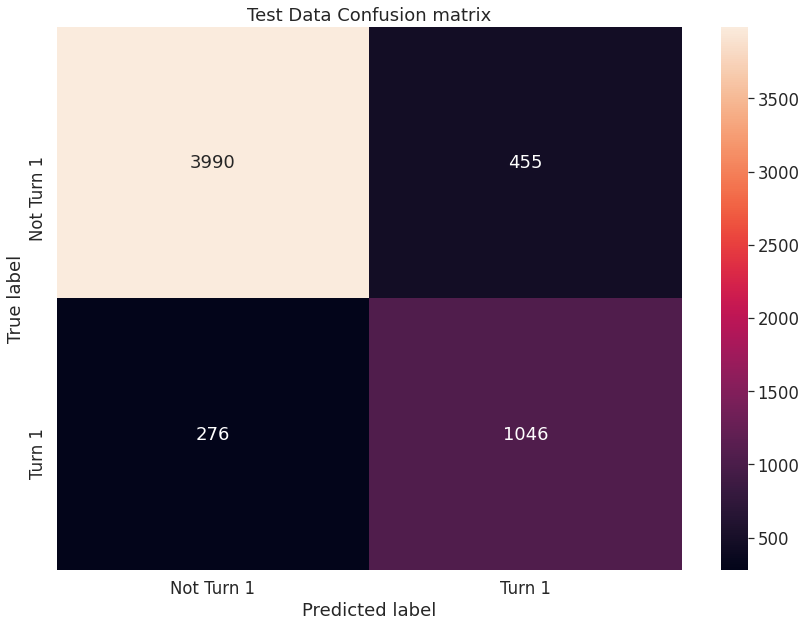

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS,  annot=True, fmt="d");
plt.title("Test Data Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

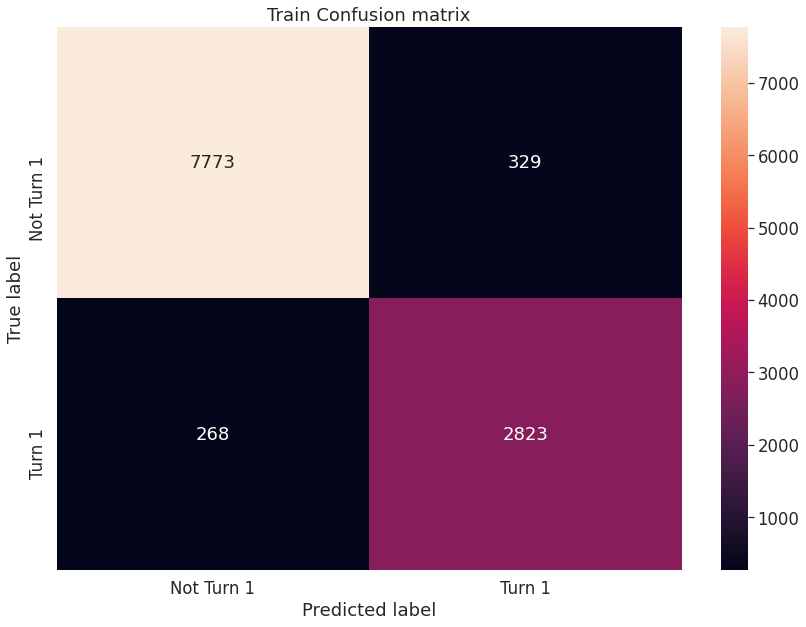

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(confusion_matrix_t, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Train Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

-------------------------------------

<br>

<br>

------------------------------------------------------

# Turn 2 

In [ ]:
#n_timesteps, n_features, n_outputs = X_train.shape[1] , X_train.shape[2] , y_train_dum.shape[1]

n_outputs =  y_train_under_dum_go.shape[1]

# set up model
model_turn2 = Sequential()

#input layer
model_turn2.add(Dense(100, activation='relu' , input_shape = (X_train_under_go_scale.shape[1], )))


# hidden layers
model_turn2.add(Dense(50, activation='relu'))
model_turn2.add(Dropout(0.5))
model_turn2.add(Dense(50, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(100, activation='relu'))

# output layer
model_turn2.add(Dense(n_outputs, activation='softmax'))

# compile model
model_turn2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.CategoricalAccuracy()])

Early Stopping

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

 	
# patient early stopping
#es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=5 , min_delta=0.05)


earlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.base_model_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')

Fit 

In [ ]:
# just for timing model
t0 = time.time()

# fitting model 
history_turn2 = model_turn2.fit(X_train_under_turn2_scale, y_train_under_dum_turn2,
                    validation_data=(X_test_scale, y_test_dum_turn2 ),
                    epochs = 100,
                    batch_size=200,
                    callbacks=[earlyStopping, mcp_save]
                    )


t1 = time.time()

total = t1-t0

print(f'Time Taken: {total}')

Epoch 1/100
56/56 [==============================] - 1s 9ms/step - loss: 0.5372 - categorical_accuracy: 0.7197 - val_loss: 0.5044 - val_categorical_accuracy: 0.7682
Epoch 2/100
56/56 [==============================] - 0s 4ms/step - loss: 0.4309 - categorical_accuracy: 0.7639 - val_loss: 0.4793 - val_categorical_accuracy: 0.7736
Epoch 3/100
56/56 [==============================] - 0s 4ms/step - loss: 0.3820 - categorical_accuracy: 0.7761 - val_loss: 0.4639 - val_categorical_accuracy: 0.7854
Epoch 4/100
56/56 [==============================] - 0s 4ms/step - loss: 0.3606 - categorical_accuracy: 0.7886 - val_loss: 0.4770 - val_categorical_accuracy: 0.7965
Epoch 5/100
56/56 [==============================] - 0s 3ms/step - loss: 0.3229 - categorical_accuracy: 0.7990 - val_loss: 0.4375 - val_categorical_accuracy: 0.8055
Epoch 6/100
56/56 [==============================] - 0s 3ms/step - loss: 0.3054 - categorical_accuracy: 0.8077 - val_loss: 0.4392 - val_categorical_accuracy: 0.8129
Epoch 7/10

Learning Curves

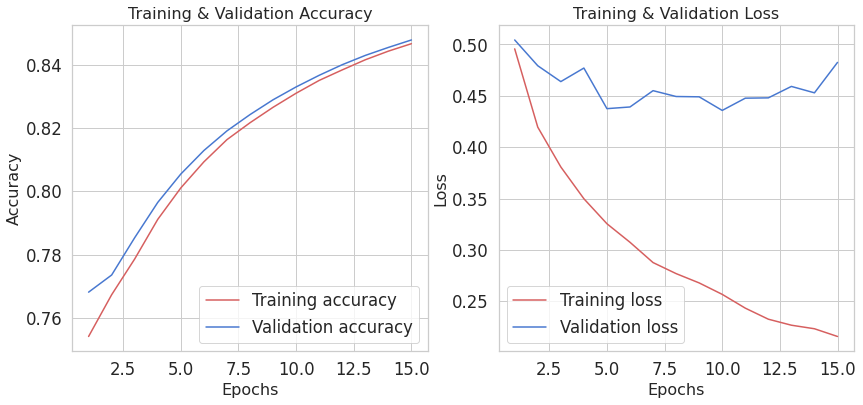

In [ ]:
history_dict = history_turn2.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['categorical_accuracy']
val_accuracy = history_dict['val_categorical_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'r', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'r', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

------------------------

Reports

Make Predicitions

In [ ]:
# For Confusion matrix & Classification Report 

y_preds = model_turn2.predict(X_test_scale)
max_predictions = np.argmax(y_preds, axis=1)

max_test = np.argmax(np.asarray(y_test_dum_turn2), axis=1)

##################


y_preds_train = model_turn2.predict(X_train_under_turn2_scale)

max_predictions_train = np.argmax(y_preds_train, axis=1)
max_train = np.argmax(np.asarray(y_train_under_dum_turn2), axis=1)


# Metrics 

Test

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

print("Test Accuracy : \t\t" ,accuracy_score(max_test, max_predictions))
print("Test Balanced Accuracy : \t" , balanced_accuracy_score(max_test, max_predictions))
print("Test F1 Score : \t\t" , f1_score(max_test, max_predictions , average='weighted'))

Test Accuracy : 		 0.833882434541356
Test Balanced Accuracy : 	 0.746523587361394
Test F1 Score : 		 0.8247832815286941


Train

In [ ]:
print("Train Accuracy : \t\t" ,accuracy_score(max_train, max_predictions_train))
print("Train Balanced Accuracy : \t" , balanced_accuracy_score(max_train, max_predictions_train))
print("Train F1 Score : \t\t" , f1_score(max_train, max_predictions_train, average='weighted'))

Train Accuracy : 		 0.9295095148753685
Train Balanced Accuracy : 	 0.8852769677520943
Train F1 Score : 		 0.9286923982319274


Imports 

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# set up labels 
LABELS = ['Not Turn 2', 'Turn 2']


# Test Set 

In [ ]:
print(classification_report(max_test, max_predictions , target_names=LABELS))


              precision    recall  f1-score   support

  Not Turn 2       0.85      0.94      0.89      4209
      Turn 2       0.76      0.56      0.64      1558

    accuracy                           0.83      5767
   macro avg       0.81      0.75      0.77      5767
weighted avg       0.83      0.83      0.82      5767



# Train Set 

In [ ]:
print(classification_report(max_train, max_predictions_train , target_names=LABELS))

              precision    recall  f1-score   support

  Not Turn 2       0.95      0.96      0.96      8762
      Turn 2       0.86      0.81      0.83      2431

    accuracy                           0.93     11193
   macro avg       0.90      0.89      0.89     11193
weighted avg       0.93      0.93      0.93     11193



--------------------

# Confusion Matrix 

In [ ]:
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions  )

confusion_matrix_t = metrics.confusion_matrix(max_train, max_predictions_train )

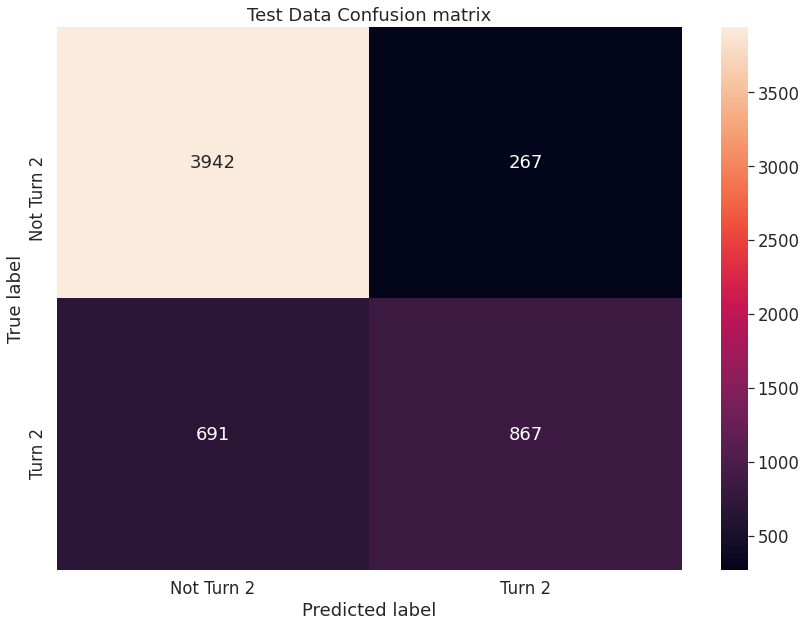

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS,  annot=True, fmt="d");
plt.title("Test Data Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

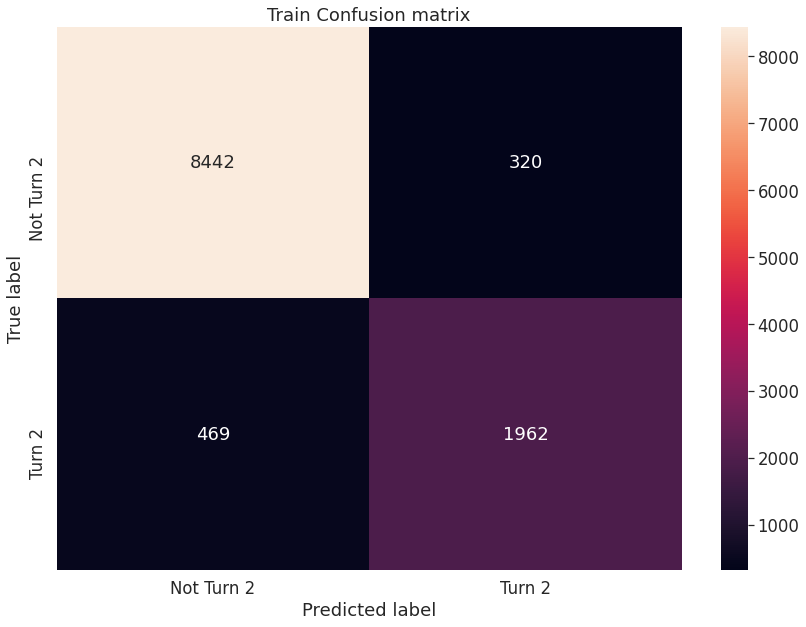

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(confusion_matrix_t, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Train Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

-------------------------------------

<br>

------------------------------------------------------

# Sit

In [ ]:
#n_timesteps, n_features, n_outputs = X_train.shape[1] , X_train.shape[2] , y_train_dum.shape[1]

n_outputs =  y_train_under_dum_go.shape[1]

# set up model
model_sit = Sequential()

#input layer
model_sit.add(Dense(100, activation='relu' , input_shape = (X_train_under_go_scale.shape[1], )))


# hidden layers
model_sit.add(Dense(50, activation='relu'))
model_sit.add(Dropout(0.5))
model_sit.add(Dense(50, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(100, activation='relu'))

# output layer
model_sit.add(Dense(n_outputs, activation='softmax'))

# compile model
model_sit.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.CategoricalAccuracy()])

Early Stopping

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

 	
# patient early stopping
#es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=5 , min_delta=0.05)


earlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.base_model_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')

Fit 

In [ ]:
# just for timing model
t0 = time.time()

# fitting model 
history_sit = model_sit.fit(X_train_under_sit_scale, y_train_under_dum_sit,
                    validation_data=(X_test_scale, y_test_dum_sit),
                    epochs = 100,
                    batch_size=200,
                    callbacks=[earlyStopping, mcp_save]
                    )


t1 = time.time()

total = t1-t0

print(f'Time Taken: {total}')

Epoch 1/100
17/17 [==============================] - 1s 26ms/step - loss: 0.7401 - categorical_accuracy: 0.4806 - val_loss: 0.7857 - val_categorical_accuracy: 0.4155
Epoch 2/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6740 - categorical_accuracy: 0.3850 - val_loss: 0.7551 - val_categorical_accuracy: 0.4252
Epoch 3/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6429 - categorical_accuracy: 0.4342 - val_loss: 0.7455 - val_categorical_accuracy: 0.4558
Epoch 4/100
17/17 [==============================] - 0s 7ms/step - loss: 0.6329 - categorical_accuracy: 0.4624 - val_loss: 0.7153 - val_categorical_accuracy: 0.4812
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.5962 - categorical_accuracy: 0.4906 - val_loss: 0.7543 - val_categorical_accuracy: 0.5043
Epoch 6/100
17/17 [==============================] - 0s 7ms/step - loss: 0.5737 - categorical_accuracy: 0.5099 - val_loss: 0.6635 - val_categorical_accuracy: 0.5271
Epoch 7/1

Learning Curves

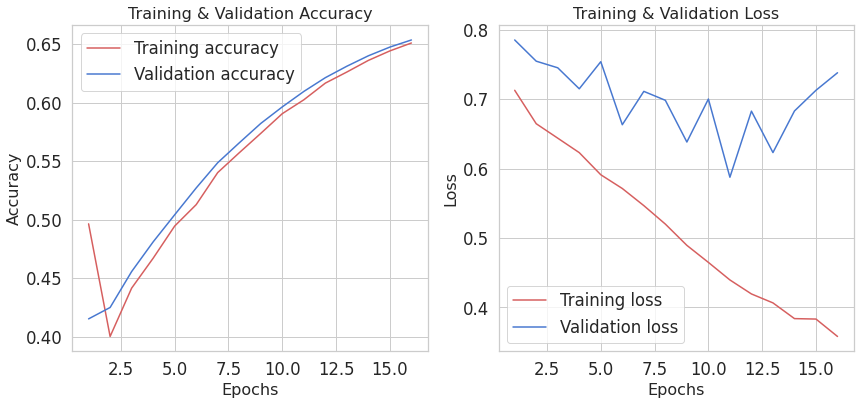

In [ ]:
history_dict = history_sit.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['categorical_accuracy']
val_accuracy = history_dict['val_categorical_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'r', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'r', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

------------------------

Reports

Make Predicitions

In [ ]:
# For Confusion matrix & Classification Report 

y_preds = model_sit.predict(X_test_scale)
max_predictions = np.argmax(y_preds, axis=1)

max_test = np.argmax(np.asarray(y_test_dum_sit), axis=1)

##################


y_preds_train = model_sit.predict(X_train_under_sit_scale)

max_predictions_train = np.argmax(y_preds_train, axis=1)
max_train = np.argmax(np.asarray(y_train_under_dum_sit), axis=1)


# Metrics 

Test

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

print("Test Accuracy : \t\t" ,accuracy_score(max_test, max_predictions))
print("Test Balanced Accuracy : \t" , balanced_accuracy_score(max_test, max_predictions))
print("Test F1 Score : \t\t" , f1_score(max_test, max_predictions , average='weighted'))

Test Accuracy : 		 0.6736604820530605
Test Balanced Accuracy : 	 0.7265740588525399
Test F1 Score : 		 0.7406815003362395


Train

In [ ]:
print("Train Accuracy : \t\t" ,accuracy_score(max_train, max_predictions_train))
print("Train Balanced Accuracy : \t" , balanced_accuracy_score(max_train, max_predictions_train))
print("Train F1 Score : \t\t" , f1_score(max_train, max_predictions_train, average='weighted'))

Train Accuracy : 		 0.8783036263060848
Train Balanced Accuracy : 	 0.8783036263060848
Train F1 Score : 		 0.8779465670980172


Imports 

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# set up labels 
LABELS = ['Not Sit', 'Sit']


# Test Set 

In [ ]:
print(classification_report(max_test, max_predictions , target_names=LABELS))


              precision    recall  f1-score   support

     Not Sit       0.97      0.66      0.79      5214
         Sit       0.20      0.79      0.32       553

    accuracy                           0.67      5767
   macro avg       0.58      0.73      0.55      5767
weighted avg       0.89      0.67      0.74      5767



# Train Set 

In [ ]:
print(classification_report(max_train, max_predictions_train , target_names=LABELS))

              precision    recall  f1-score   support

     Not Sit       0.92      0.82      0.87      1627
         Sit       0.84      0.93      0.88      1627

    accuracy                           0.88      3254
   macro avg       0.88      0.88      0.88      3254
weighted avg       0.88      0.88      0.88      3254



--------------------

# Confusion Matrix 

In [ ]:
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions  )

confusion_matrix_t = metrics.confusion_matrix(max_train, max_predictions_train )

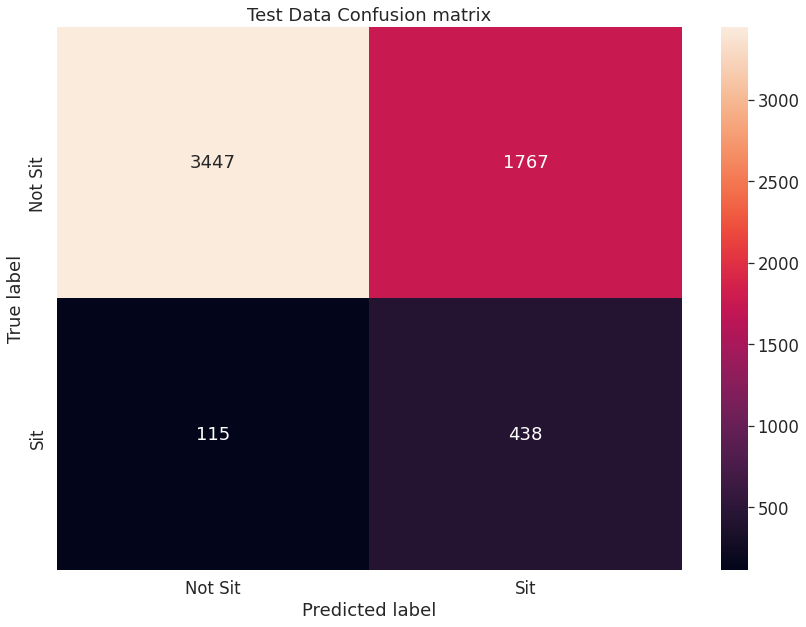

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS,  annot=True, fmt="d");
plt.title("Test Data Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

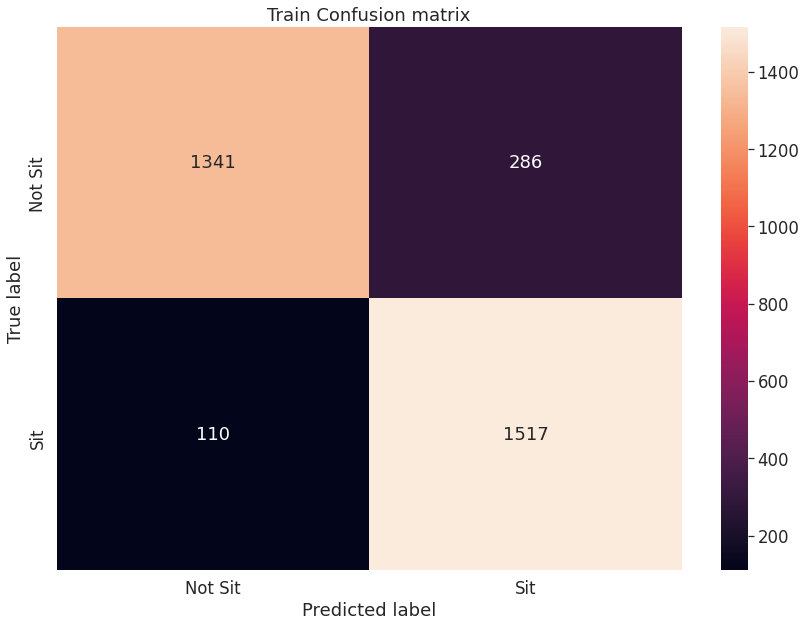

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(confusion_matrix_t, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Train Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

-------------------------------------

In [ ]:
# upload one dataframe to test logic of model 

# from google.colab import files
# uploaded_dataframe_test = files.upload()

In [ ]:
test_df = pd.read_csv('29_9_Participant_SlideSize_10_Handcrafted_Features_DF_Resampled_RCP')

FileNotFoundError: ignored

In [ ]:
# Getting X_train & y_train
X_data = test_df.drop(['Unnamed: 0' , 'Label_segment' , 'Participant_ID' , 'Participant_Run','X_Acc_Move_FFT_EnergyBands', 	'Y_Acc_Move_FFT_EnergyBands', 	'Z_Acc_Move_FFT_EnergyBands' ], axis = 1)
#X_data = signal_test.drop(['Unnamed: 0' , 'Label_segment' , 'Participant_ID' , 'Participant_Run' ], axis = 1)

y_data = test_df['Label_segment'].values

# scale with already fit ss 
X_data_scale = ss.transform(X_data)

# convert to dummy category
y_data_dum = pd.get_dummies(y_data)

# Take max of dummy classifier
y_data = np.argmax(np.asarray(y_data_dum), axis=1)

In [ ]:
# Go 
go_model_preds = model.predict(X_data_scale)

# Walk 1
walk1_model_preds = model_walk1.predict(X_data_scale)

# Turn 1 
turn1_model_preds = model_turn1.predict(X_data_scale)

# Walk 2 
walk2_model_preds = model_walk2.predict(X_data_scale)

# Turn 2 
turn2_model_preds = model_turn2.predict(X_data_scale)

# Sit
sit_model_preds = model_sit.predict(X_data_scale)

------------------------------------------------

<br>

<br>